### A) 

SELECT <br>
s.plate,s.mjd, s.fiberid, s.z, <br>
g.oiii_5007_flux, g.h_beta_flux, g.h_gamma_flux, <br>
g.oiii_5007_cont, g.h_beta_cont, g.h_gamma_cont, <br>
g.oiii_5007_eqw, g.h_beta_eqw, g.h_gamma_eqw, <br>
l.e_bv_sfd, <br>
g.oiii_5007_flux / g.h_beta_flux AS '[O III]/Hb', <br>
g.h_beta_flux / g.h_gamma_flux AS 'Hb/Hg', <br>
g.oiii_5007_flux / g.h_gamma_flux AS '[O III]/Hg' <br>
FROM SpecObj AS s <br>
JOIN GalSpecLine AS g ON s.specobjid = g.specobjid <br>
JOIN GalSpecInfo l on s.specobjid = l.specobjid <br>
WHERE <br>
(g.sigma_balmer * 2.355) > 1000 <br>
AND s.class IN ('QSO','GALAXY') <br>
AND s.z BETWEEN 0.05 AND 0.3 <br>
AND s.snmedian_g >35 <br>
AND g.oiii_5007_flux <> 0 <br>
AND g.h_beta_flux <> 0 <br>
AND g.h_gamma_flux <> 0 <br>
                

I found 285 results on the initial query.

### B)

Without the FWHM condition, we have 525 values.

Redshift ratio when excluded gives around 5000 times more rows.

S/N ratio when excluded gives 500004 rows. - this is the one that effects the results the most

### C)


SELECT <br> 
s.plate,s.subClass,s.mjd, s.fiberid, s.z,<br> 
g.oiii_5007_flux, g.h_beta_flux, g.h_gamma_flux, <br> 
g.oiii_5007_cont, g.h_beta_cont, g.h_gamma_cont, <br> 
g.oiii_5007_eqw, g.h_beta_eqw, g.h_gamma_eqw, <br> 
l.e_bv_sfd, <br> 
g.oiii_5007_flux / g.h_beta_flux AS '[O III]/Hb', <br> 
g.h_beta_flux / g.h_gamma_flux AS 'Hb/Hg', <br> 
g.oiii_5007_flux / g.h_gamma_flux AS '[O III]/Hg' <br> 
FROM SpecObj AS s <br> 
JOIN GalSpecLine AS g ON s.specobjid = g.specobjid <br> 
JOIN GalSpecInfo l on s.specobjid = l.specobjid <br> 
WHERE <br> 
(g.sigma_balmer * 2.355) > 1000 <br> 
AND s.subClass LIKE '%AGN%'<br> 
AND s.z BETWEEN 0.05 AND 0.3 <br> 
AND s.snmedian_g >35 <br> 
AND g.oiii_5007_flux <> 0 <br> 
AND g.h_beta_flux <> 0 <br> 
AND g.h_gamma_flux <> 0 <br> 

Sublasse found: <br>
<b>AGN BROADLINE

### D)

<b>Query submitted to CrossID tool

SELECT s.specobjid, s.ra, s.dec, s.plate, s.mjd, s.fiberid, s.subClass, s.fiberid, s.z, <br> 
g.oiii_5007_flux, g.h_beta_flux, g.h_gamma_flux, <br> 
g.oiii_5007_cont, g.h_beta_cont, g.h_gamma_cont, <br> 
g.oiii_5007_eqw, g.h_beta_eqw, g.h_gamma_eqw, <br> 
l.e_bv_sfd, <br> 
g.oiii_5007_flux / g.h_beta_flux AS "[O III]/Hb", <br> 
g.h_beta_flux / g.h_gamma_flux AS "Hb/Hg", <br> 
g.oiii_5007_flux / g.h_gamma_flux AS "[O III]/Hg" <br> 
FROM #upload u <br> 
      JOIN SpecObjAll s ON (s.plate=u.up_plate AND s.mjd=u.up_mjd AND s.fiberID=u.up_fiber) <br> 
      JOIN GalSpecLine AS g ON s.specobjid = g.specobjid <br> 
      JOIN GalSpecInfo l on s.specobjid = l.specobjid <br> 
WHERE <br> 
(g.sigma_balmer * 2.355) > 1000 <br> 
AND s.class IN ("QSO","GALAXY") <br> 
AND s.z BETWEEN 0.05 AND 0.6 <br> 
AND s.snmedian_g >35 <br> 
AND g.oiii_5007_flux <> 0 <br> 
AND g.h_beta_flux <> 0 <br> 
AND g.h_gamma_flux <> 0 <br> 

47 objects found.

## e) and f)

In [1]:
# Do set up
import numpy as np
from astropy.io import fits
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [18]:
from astropy.io import fits

# Open the FITS file
hdu1 = fits.open('spec-0640-52178-0513.fits') 
hdu2 = fits.open('spec-1791-54266-0046.fits') 

In [20]:
# read data and headers
data1d = hdu1[1].data
header1d = hdu1[1].header

data2d = hdu2[1].data
header2d = hdu2[1].header

# Set up variables to plot -- flux, wavelength, and inverse variance (1./sigma^2)
flux1d = data1d['flux']
wave1d = data1d['loglam']

flux2d = data2d['flux']
wave2d = data2d['loglam']

In [8]:
data1d

FITS_rec([(70.67921 , 3.58  , 0.06520922, 0, 201326592, 1.0243372 , 70.424866, 72.11994 ),
          (69.60653 , 3.5801, 0.06642403, 0, 201326592, 1.0242157 , 72.89643 , 72.36285 ),
          (71.08788 , 3.5802, 0.06506979, 0, 201326592, 1.023977  , 74.62697 , 72.26593 ),
          ...,
          (24.248676, 3.9638, 1.1202179 , 0,     65552, 0.68015426,  9.081824, 26.260668),
          (25.019222, 3.9639, 1.0937644 , 0,     65552, 0.6804419 ,  8.992276, 26.431637),
          (27.518837, 3.964 , 1.0024801 , 0,     65552, 0.6801574 ,  9.291992, 26.767694)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

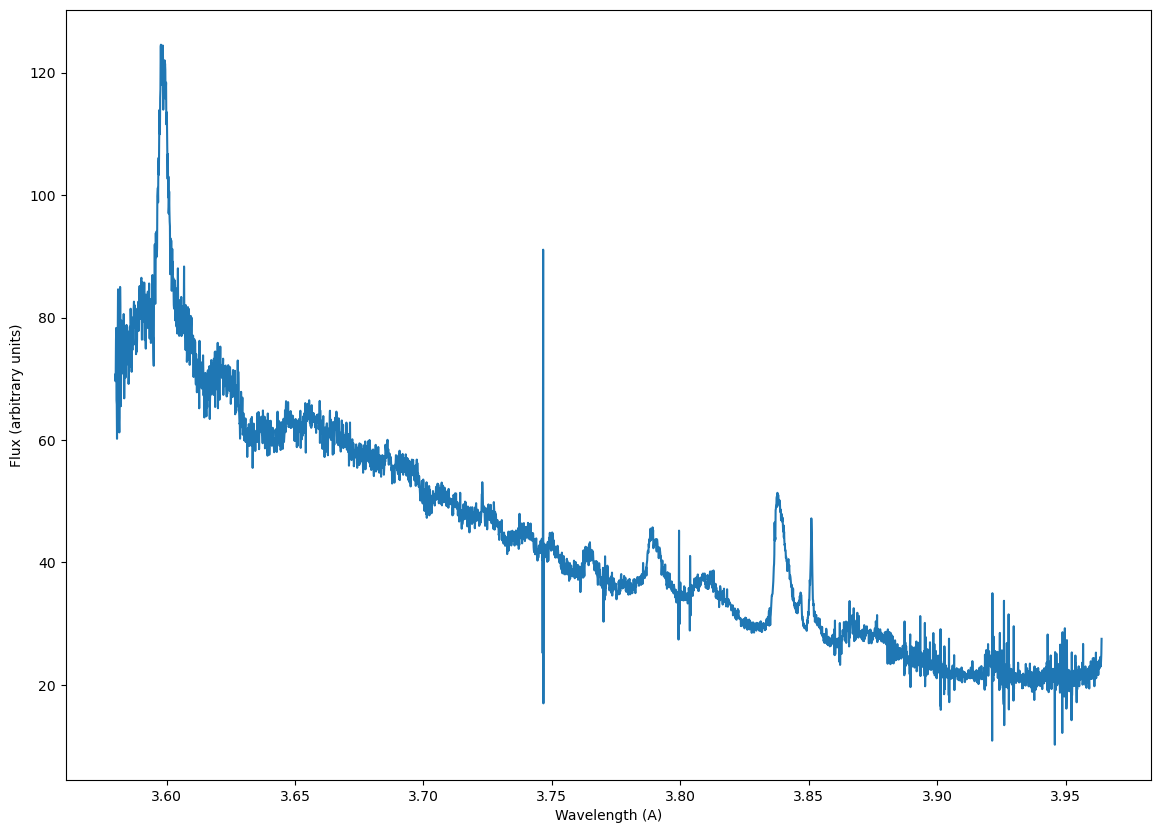

In [9]:
# Plot 1d spectrum

f=plt.figure(figsize=[14,10])
plt.plot(wave1d,flux1d)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux (arbitrary units)')
plt.show()

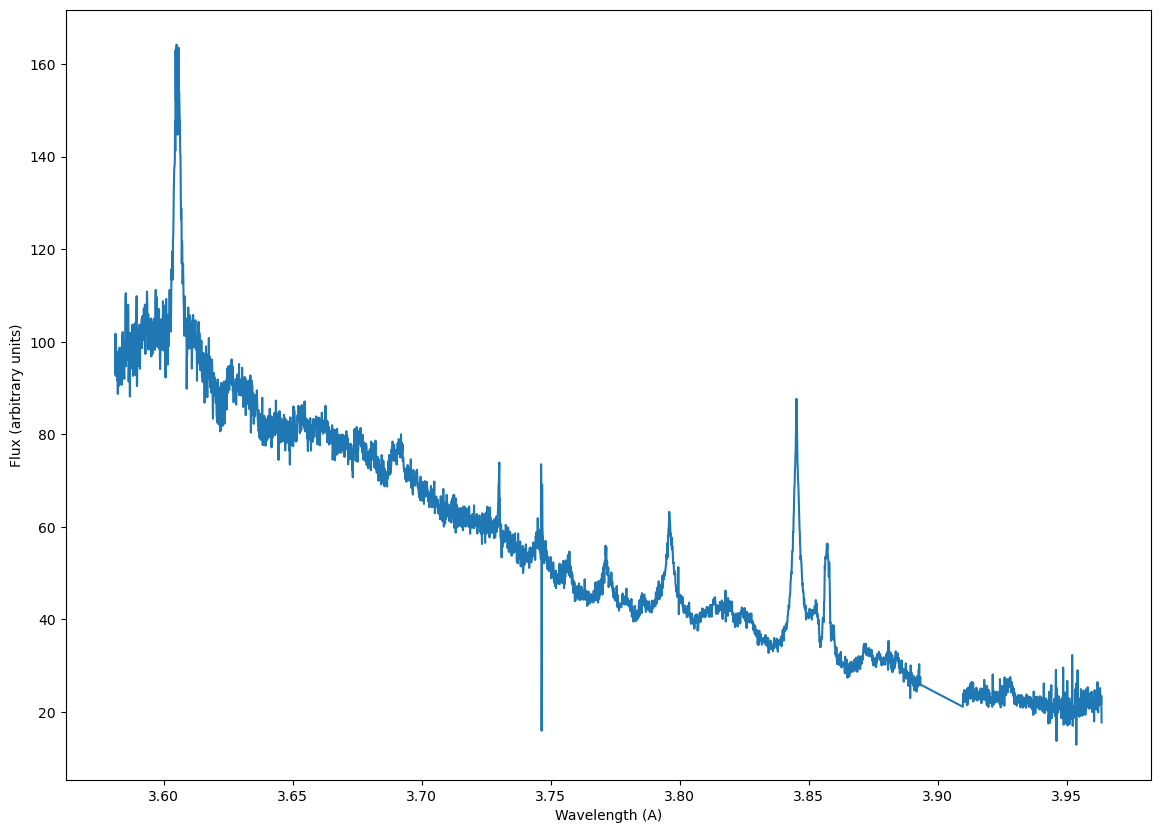

In [21]:
f=plt.figure(figsize=[14,10])
plt.plot(wave2d,flux2d)
plt.xlabel('Wavelength (A)')
plt.ylabel('Flux (arbitrary units)')
plt.show()